## 分析从2006年到2016年1000部最流行的电影数据
> 数据来源：https://www.kaggle.com/damianpanek/sunday-eda/data

在data文件夹存放有`IMDB-Movie-Data.csv`文件，路径：`path = '../data/IMDB-Movie-Data.csv'`

- 问题：我们想知道这些电影数据中评分的平均分，导演的人数等信息，我们应该怎么获取？

In [3]:
import pandas as pd

df = pd.read_csv(r"C:\Users\zhoux\Downloads\data\IMDB-Movie-Data.csv")
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [67]:
df.shape

(1000, 12)

### 所有电影平均分和各电影评分

In [71]:
avg = df['Rating'].mean()
print('2006-2016年电影评分平均分为{}'.format(round(avg,2)))

2006-2016年电影评分平均分为6.72


In [6]:
groups = df.groupby ('Title')
groups['Rating'].mean()

Title
(500) Days of Summer    7.7
10 Cloverfield Lane     7.2
10 Years                6.1
12 Years a Slave        8.1
127 Hours               7.6
                       ... 
Zipper                  5.7
Zodiac                  7.7
Zombieland              7.7
Zoolander 2             4.7
Zootopia                8.1
Name: Rating, Length: 999, dtype: float64

### 导演总人数

In [4]:
dr = df['Director'].drop_duplicates().shape[0]
print('2006-2016年电影导演总人数为{}人。'.format(dr))

2006-2016年电影导演总人数为644人。


### 电影收入排名前20

In [7]:
rev = groups['Revenue (Millions)'].sum()
rev_rk = rev.sort_values(ascending = False)[0:20]
rev_rk

Title
Star Wars: Episode VII - The Force Awakens      936.63
Avatar                                          760.51
Jurassic World                                  652.18
The Avengers                                    623.28
The Dark Knight                                 533.32
Rogue One                                       532.17
Finding Dory                                    486.29
Avengers: Age of Ultron                         458.99
The Dark Knight Rises                           448.13
The Hunger Games: Catching Fire                 424.65
Pirates of the Caribbean: Dead Man's Chest      423.03
Toy Story 3                                     414.98
Iron Man Three                                  408.99
Captain America: Civil War                      408.08
The Hunger Games                                408.00
Transformers: Revenge of the Fallen             402.08
Frozen                                          400.74
Harry Potter and the Deathly Hallows: Part 2    380.96
The 

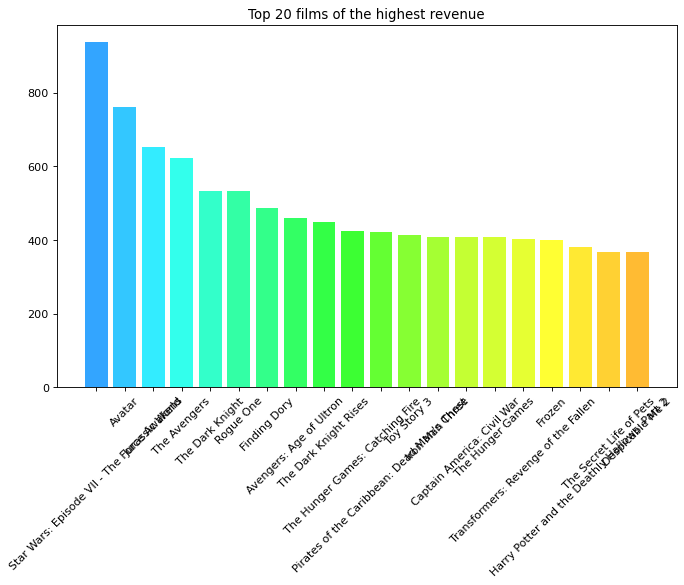

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,6),dpi = 80)
plt.bar(rev_rk.index, rev_rk.values,color = ['#33A5FF','#33C7FF','#33ECFF','#33FFEC','#33FFCA','#33FFA5','#33FF8A','#33FF64','#33FF46','#3CFF33','#64FF33','#86FF33','#A5FF33','#C4FF33','#D4FF33','#E6FF33','#FFFF33','#FFE933','#FFD133','#FFBB33'])
plt.title('Top 20 films of the highest revenue')
plt.xticks(rotation = 45)

plt.show()

### 年收入增长趋势

In [26]:
group_year = df.groupby('Year').sum()
group_year

,Rank,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Year,,,,,,
2006,25894,5317,313.5,11848758,3624.46,2641.0
2007,30559,6446,378.1,12949545,4306.23,2967.0
2008,32533,5763,352.8,14326280,5053.22,2813.0
2009,29928,5922,355.0,13044813,5292.26,2799.0
2010,35239,6668,409.6,15166939,5989.65,3504.0
2011,37143,7220,430.8,15169789,5431.96,3580.0
2012,34104,7623,443.2,18254470,6910.29,3791.0
2013,50617,10562,619.9,19933518,7666.72,5034.0
2014,50272,11220,670.1,19985162,7997.40,5445.0


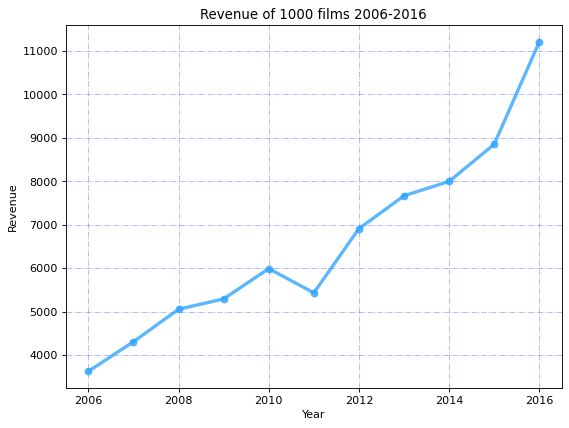

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8,6),dpi = 80)
plt.plot(group_year.index, group_year['Revenue (Millions)'],alpha = 0.8, linewidth = 3,marker = 'o',color = '#33A5FF')
plt.grid(linestyle = '-.',alpha = 0.3, color = 'blue')

plt.title('Revenue of 1000 films 2006-2016')
plt.xlabel('Year')
plt.ylabel('Revenue')

plt.show()

### 创收最多TOP10导演

In [93]:
dir = df.groupby('Director')['Revenue (Millions)'].sum()
dir.sort_values(ascending = False).iloc[0:10]

Director
J.J. Abrams          1683.45
David Yates          1630.51
Christopher Nolan    1515.09
Michael Bay          1421.32
Francis Lawrence     1299.81
Joss Whedon          1082.27
Jon Favreau          1025.60
Zack Snyder           975.74
Peter Jackson         860.45
Gore Verbinski        829.82
Name: Revenue (Millions), dtype: float64

### 电影时长分布

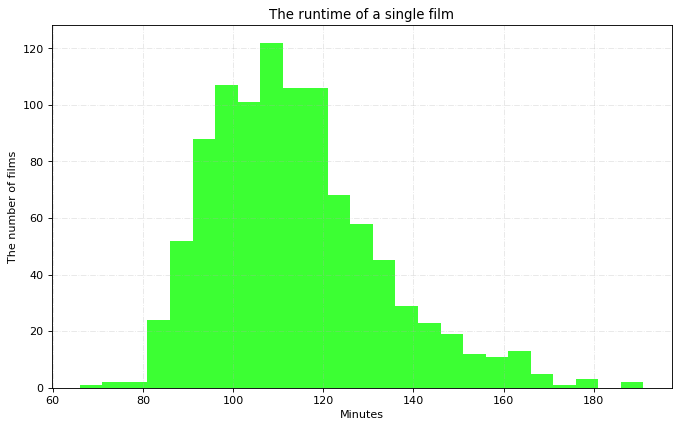

In [21]:
df_time = df['Runtime (Minutes)'].values.tolist()

plt.figure(figsize = (10,6), dpi= 80)
dst = int((max(df_time)-min(df_time))/5)
plt.hist(df_time,bins = dst,color = '#3CFF33')
# plt.xticks(range(min(df_time),max(df_time)))[::5]
plt.grid(linestyle = '-.',alpha = 0.3)

plt.title('The runtime of a single film')
plt.xlabel('Minutes')
plt.ylabel('The number of films')

plt.show()

### 电影时长分布

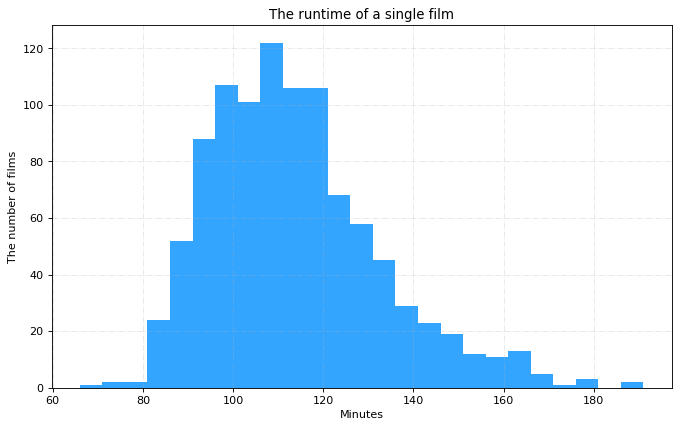

In [24]:
plt.figure(figsize = (10,6), dpi= 80)
dst = int((max(df['Runtime (Minutes)'])-min(df['Runtime (Minutes)']))/5)
plt.hist(df['Runtime (Minutes)'],bins = dst,color = ['#33A5FF'])
plt.grid(linestyle = '-.',alpha = 0.3)

plt.title('The runtime of a single film')
plt.xlabel('Minutes')
plt.ylabel('The number of films')

plt.show()

### 电影分类占比

In [114]:
df.groupby('Genre').size()

Genre
Action                         2
Action,Adventure               3
Action,Adventure,Biography     2
Action,Adventure,Comedy       14
Action,Adventure,Crime         6
                              ..
Romance,Sci-Fi,Thriller        1
Sci-Fi                         2
Sci-Fi,Thriller                1
Thriller                       9
Thriller,War                   1
Length: 207, dtype: int64

### 每年电影数量占比

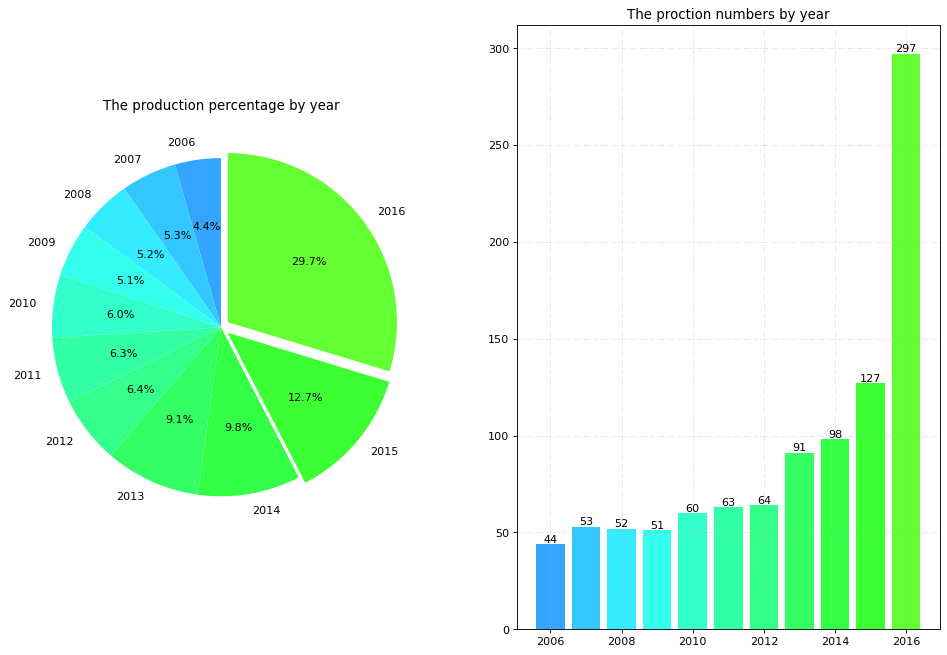

In [44]:
plt.figure(figsize = (15,10), dpi = 80)

colors = ['#33A5FF','#33C7FF','#33ECFF','#33FFEC','#33FFCA','#33FFA5','#33FF8A','#33FF64','#33FF46','#3CFF33','#64FF33','#86FF33','#A5FF33','#C4FF33','#D4FF33','#E6FF33','#FFFF33','#FFE933','#FFD133','#FFBB33']

plt.subplot(1,2,1)
num = df.groupby('Year').size()
explode = [0,0,0,0,0,0,0,0,0,0.05,0.05]
plt.pie(num, labels = num.index,autopct = '%.1f%%',startangle = 90, colors = colors, explode = explode)
plt.title('The production percentage by year')

plt.subplot(1,2,2)
num = df.groupby('Year').size()
hects = plt.bar(num.index,num, color = colors)
plt.title('The proction numbers by year')
plt.grid(linestyle = '-.',alpha = 0.3)

for hect in hects:
    plt.text(hect.get_x()+hect.get_width()/2, hect.get_height()+1, str(hect.get_height()),ha = 'center')

plt.show()